Question02 - Intensity Transformation - A brain proton density slice.

In [1]:
# Question 2: Accentuating White and Gray Matter in Brain Proton Density Image

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [4]:
# -------------------------------
# Step 1: Set paths for input/output
# -------------------------------
input_image_path = Path("../data/a1images/brain_proton_density_slice.png")

output_folder = Path("../data/output_images")
os.makedirs(output_folder, exist_ok=True)

output_white = output_folder / "q2_white_matter.png"
output_gray = output_folder / "q2_gray_matter.png"

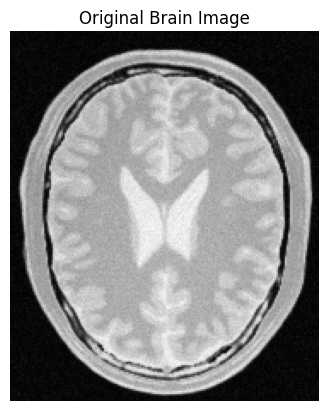

In [5]:
# -------------------------------
# Step 2: Load image in grayscale
# -------------------------------
img_gray = cv.imread(str(input_image_path), cv.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"Could not find image at {input_image_path}")

# Display original brain image
plt.imshow(img_gray, cmap='gray')
plt.title("Original Brain Image")
plt.axis('off')
plt.show()

In [6]:
# -------------------------------
# Step 3: Build LUTs for White and Gray Matter
# -------------------------------
# White matter LUT: accentuates high intensity range
lut_white = np.zeros(256, dtype=np.uint8)
lut_white[141:181] = np.linspace(141, 180, 40).astype('uint8')

# Gray matter LUT: accentuates mid intensity range
lut_gray = np.zeros(256, dtype=np.uint8)
lut_gray[181:221] = np.linspace(181, 220, 40).astype('uint8')


In [7]:
# -------------------------------
# Step 4: Apply LUTs to image
# -------------------------------
img_white = cv.LUT(img_gray, lut_white)
img_gray_accent = cv.LUT(img_gray, lut_gray)

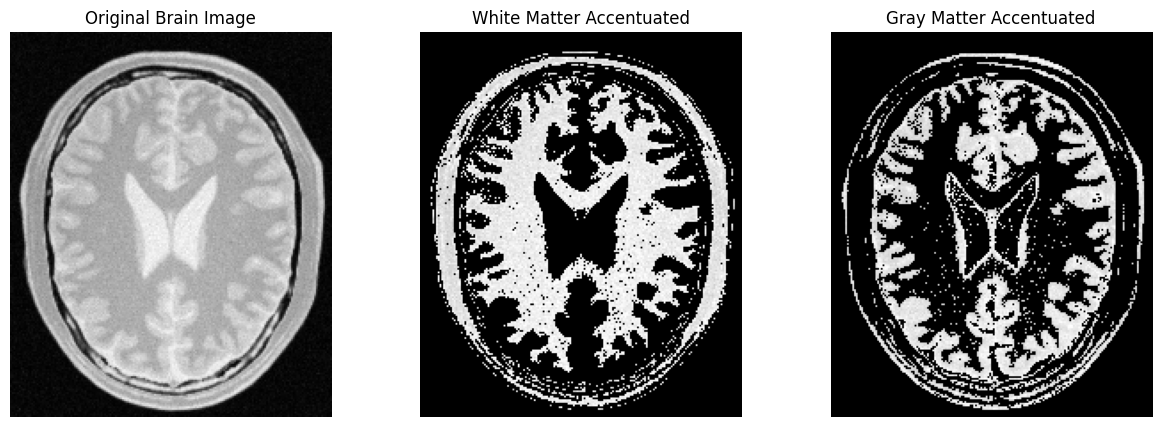

In [8]:
# -------------------------------
# Step 5: Display Original vs White/Gray Matter Accentuated Images
# -------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title("Original Brain Image")
axs[0].axis('off')

axs[1].imshow(img_white, cmap='gray')
axs[1].set_title("White Matter Accentuated")
axs[1].axis('off')

axs[2].imshow(img_gray_accent, cmap='gray')
axs[2].set_title("Gray Matter Accentuated")
axs[2].axis('off')

plt.show()


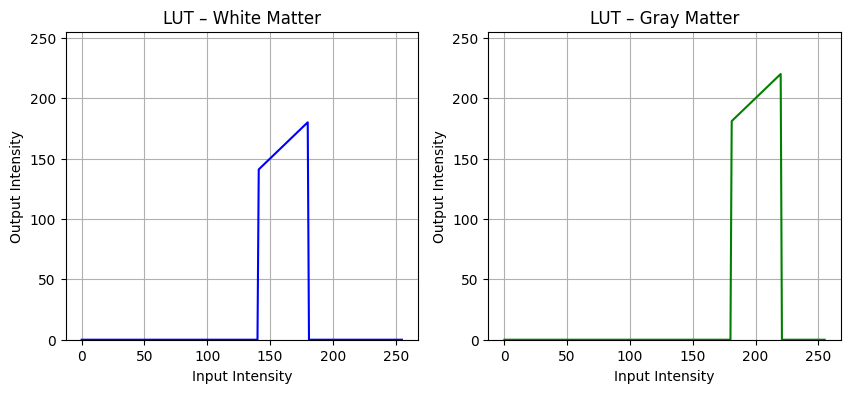

In [9]:
# -------------------------------
# Step 6: Display LUTs
# -------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(lut_white, color='blue')
plt.title("LUT – White Matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.ylim(0,255)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(lut_gray, color='green')
plt.title("LUT – Gray Matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.ylim(0,255)
plt.grid(True)

plt.show()

In [10]:
# -------------------------------
# Step 7: Save the transformed images
# -------------------------------
cv.imwrite(str(output_white), img_white)
cv.imwrite(str(output_gray), img_gray_accent)

print("White and gray matter images saved in:", output_folder)


White and gray matter images saved in: ..\data\output_images


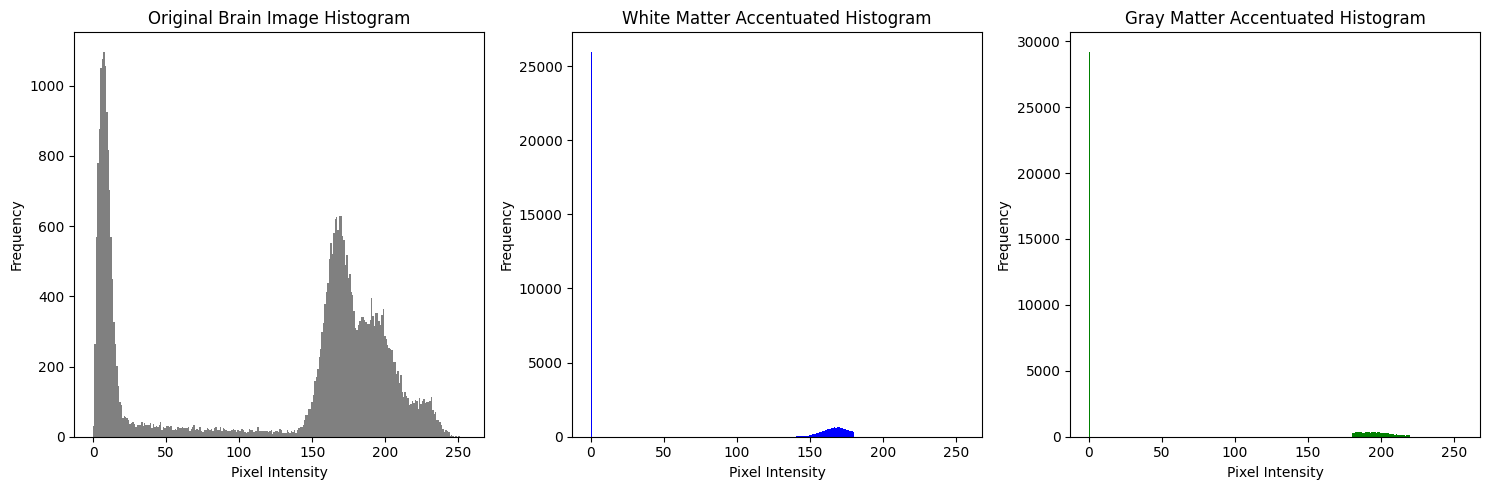

In [12]:
# -------------------------------
# Step 9: Display histograms
# -------------------------------
plt.figure(figsize=(15,5))

# Original brain image histogram
plt.subplot(1,3,1)
plt.hist(img_gray.ravel(), bins=256, range=(0,255), color='gray')
plt.title("Original Brain Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# White matter histogram
plt.subplot(1,3,2)
plt.hist(img_white.ravel(), bins=256, range=(0,255), color='blue')
plt.title("White Matter Accentuated Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Gray matter histogram
plt.subplot(1,3,3)
plt.hist(img_gray_accent.ravel(), bins=256, range=(0,255), color='green')
plt.title("Gray Matter Accentuated Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [11]:
# -------------------------------
# Step 8: Explanation
# -------------------------------
print("Explanation:")
print("- White matter LUT accentuates high-intensity regions to highlight bright structures.")
print("- Gray matter LUT accentuates mid-intensity regions to highlight gray tissues.")
print("- Pixels outside the selected intensity window remain black (0) or unchanged (0 outside LUT).")
print("- Original and transformed images are displayed for comparison.")

Explanation:
- White matter LUT accentuates high-intensity regions to highlight bright structures.
- Gray matter LUT accentuates mid-intensity regions to highlight gray tissues.
- Pixels outside the selected intensity window remain black (0) or unchanged (0 outside LUT).
- Original and transformed images are displayed for comparison.
